# install torch with specific version

In [ ]:
!pip uninstall -y torch torchvision torchaudio torchtext

Found existing installation: torch 2.0.0+cu118
Uninstalling torch-2.0.0+cu118:
  Successfully uninstalled torch-2.0.0+cu118
Found existing installation: torchvision 0.15.1+cu118
Uninstalling torchvision-0.15.1+cu118:
  Successfully uninstalled torchvision-0.15.1+cu118
Found existing installation: torchaudio 2.0.1+cu118
Uninstalling torchaudio-2.0.1+cu118:
  Successfully uninstalled torchaudio-2.0.1+cu118
Found existing installation: torchtext 0.15.1
Uninstalling torchtext-0.15.1:
  Successfully uninstalled torchtext-0.15.1


In [ ]:
!pip install torch==2.0.0 torchvision torchaudio torchtext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 62.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 59.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 74.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 59.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 38.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 58.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━

# unzip data from google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "/content/drive/MyDrive/"

/content/drive/MyDrive


In [ ]:
!mkdir labeled_data

In [ ]:
! unzip -q "/content/drive/MyDrive/DS Final Project/labeled_data/labeled_image.zip" -d labeled_data

In [ ]:
data_dir = './labeled_data/labeled_image'

# set up MLflow

In [ ]:
!pip install mlflow
!databricks configure --host https://community.cloud.databricks.com/

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 75.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.5/83.5 kB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.1/148.1 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.2 MB/s eta 0:00:00
  Created wheel for databricks-cli: filename=databricks_cli-0.17.7-py3-none-any.whl size=143860 sha256=ec2e65d7a23ba0ab3b38d8a19c3adeb842120b190692af05ebb822e9667f6fc0
  Stored in directory: /root/.cache/pip/wheels

In [ ]:
import mlflow
mlflow.set_tracking_uri("databricks")
mlflow.set_experiment("/final_datasci")

<Experiment: artifact_location='dbfs:/databricks/mlflow-tracking/1092466706693158', creation_time=1683271476402, experiment_id='1092466706693158', last_update_time=1683962820486, lifecycle_stage='active', name='/final_datasci', tags={'mlflow.experiment.sourceName': '/final_datasci',
 'mlflow.experimentType': 'MLFLOW_EXPERIMENT',
 'mlflow.ownerEmail': '6330159621@student.chula.ac.th',
 'mlflow.ownerId': '41919519912400'}>

# prepare data

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, WeightedRandomSampler
from torchvision.datasets import ImageFolder 
from PIL import Image
import numpy as np
import os
from tqdm.notebook import tqdm
from sklearn.metrics import classification_report

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit , train_test_split
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

In [ ]:
torch.__version__

'2.0.0+cu118'

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cpu


In [ ]:
seed = 2566
current_run = mlflow.start_run()
mlflow.log_param("seed", seed)

2566

In [ ]:
batch_size = 32

transform_train = transforms.Compose(
    [   transforms.Resize((230,230)),
        transforms.RandomRotation(25,),
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.RandomGrayscale(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # imagenet normalize
    ])

transform = transforms.Compose(
    [transforms.Resize((230,230)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

In [ ]:
class TraffyFondueDataset(Dataset):
  def __init__(self, data, transform=None):
    super().__init__()
    self.dataset = data
    self.transform = transform

  def __len__(self):
    return len(self.dataset)

  def __getitem__(self, idx):
    img, label = self.dataset[idx]
    if(self.transform): 
      img = self.transform(img)
    return img, label

In [ ]:
dataset = ImageFolder(root=data_dir)

train_set_size = int(dataset.__len__() * 0.85)
val_set_size = len(dataset) - train_set_size
train, val = torch.utils.data.random_split(dataset, [train_set_size, val_set_size])

In [ ]:
indices = train.indices
train_labels = [dataset.targets[i] for i in indices]
class_sample_count = np.array([len(np.where(train_labels == l)[0]) for l in np.unique(train_labels)])
print(class_sample_count)

weight = 1. / class_sample_count
samples_weight = np.array([weight[l] for l in train_labels])
samples_weight = torch.from_numpy(samples_weight)

sampler = WeightedRandomSampler(samples_weight.type('torch.DoubleTensor'), len(samples_weight))

[2063  701 1289]


In [ ]:
trainset = TraffyFondueDataset(train, transform=transform_train)
valset = TraffyFondueDataset(val, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, sampler=sampler)
valloader = torch.utils.data.DataLoader(valset, batch_size=batch_size, shuffle=True)

In [ ]:
dataset.__len__()

4769

In [ ]:
trainset.__len__(), valset.__len__()

(4053, 716)

tensor([1, 1, 0, 1, 0, 1, 0, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
        2, 1, 1, 2, 0, 0, 1, 1])


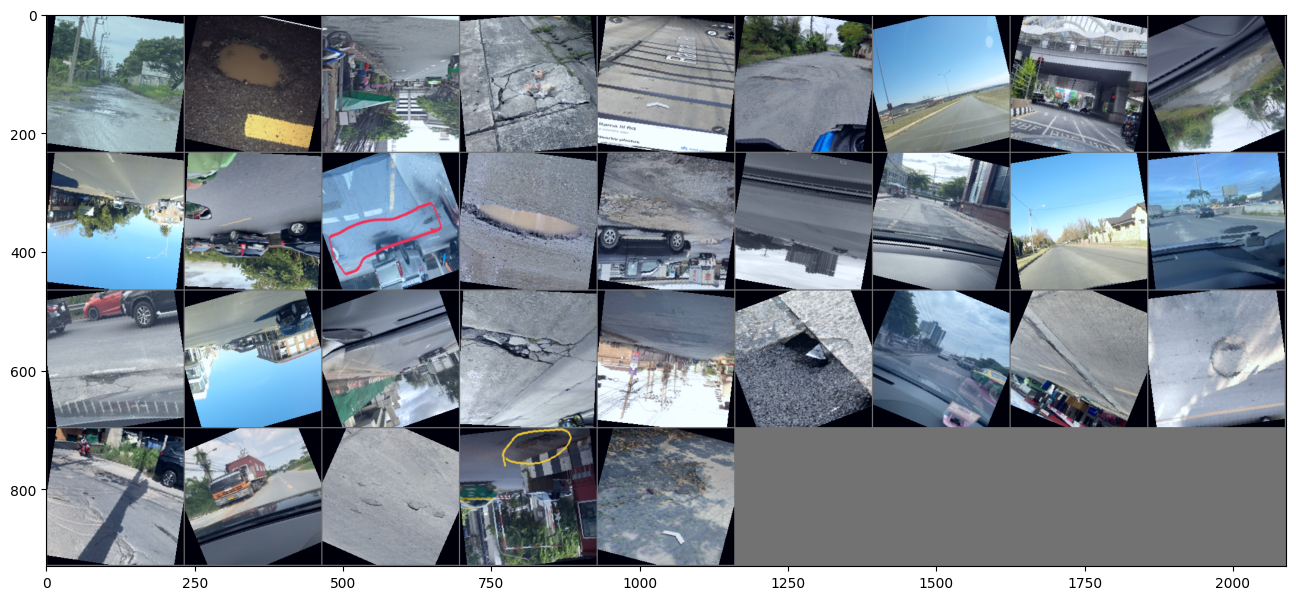

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img*torch.tensor([0.229, 0.224, 0.225]).mean() + torch.tensor([0.485, 0.456, 0.406]).mean()
    npimg = img.numpy()
    plt.figure(figsize=(16,16))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(labels)

# show images
nrow = 9
imshow(torchvision.utils.make_grid(images, nrow = nrow))

# Train model

In [ ]:
# set path
model_pth = '/content/drive/MyDrive/DS Final Project/Model/model3.pth'
result_file = '/content/drive/MyDrive/DS Final Project/Model/result3.csv'

In [ ]:
mlflow.pytorch.autolog()

2023/05/13 07:27:07 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of pytorch. If you encounter errors during autologging, try upgrading / downgrading pytorch to a supported version, or try upgrading MLflow.


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

num_classes=10
model_ft = torchvision.models.efficientnet_b1(weights='EfficientNet_B1_Weights.DEFAULT')
model_ft.classifier[-1] = nn.Sequential(
    nn.Linear(in_features=1280, out_features=num_classes),
    nn.Softmax(dim=1)
        )

net = model_ft.to(device)

Downloading: "https://download.pytorch.org/models/efficientnet_b1-c27df63c.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b1-c27df63c.pth
100%|██████████| 30.1M/30.1M [00:00<00:00, 120MB/s]


In [ ]:
import torch.optim as optim
from torch.optim import lr_scheduler

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.02, momentum=0.9)
scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.5)

In [ ]:
epochs = 20

history_train = {'loss':np.zeros(epochs), 'acc':np.zeros(epochs), 'f1-score':np.zeros(epochs)}
history_val = {'loss':np.zeros(epochs), 'acc':np.zeros(epochs), 'f1-score':np.zeros(epochs)}
min_val_loss = 1e10
PATH = model_pth


for epoch in range(epochs):  # loop over the dataset multiple times
    print(f'epoch {epoch + 1} \nTraining ...')
    net.train()
    y_predict = list()
    y_labels = list()
    training_loss = 0.0
    n = 0
    with torch.set_grad_enabled(True):
        for data in tqdm(trainloader):
            
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            inputs = inputs.to(device)
            labels = labels.to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # aggregate statistics
            training_loss += loss.item()
            n+=1

            y_labels += list(labels.cpu().numpy())
            y_predict += list(outputs.argmax(dim=1).cpu().numpy())
    scheduler.step()

    # print statistics
    report = classification_report(y_labels, y_predict, digits = 4, output_dict = True)
    acc = report["accuracy"]
    f1 = report["weighted avg"]["f1-score"]
    support = report["weighted avg"]["support"]
    training_loss /= n
    print(f"training loss: {training_loss:.4}, acc: {acc*100:.4}%, f1-score: {f1*100:.4}%, support: {support}" )
    history_train['loss'][epoch] = training_loss
    history_train['acc'][epoch] = acc
    history_train['f1-score'][epoch] = f1

    print('validating ...')
    net.eval()
    
    optimizer.zero_grad()
    
    y_predict = list()
    y_labels = list()
    validation_loss = 0.0
    n = 0
    with torch.no_grad():
        for data in tqdm(valloader):
            inputs, labels = data
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = net(inputs)
            loss = criterion(outputs, labels)
            validation_loss += loss.item()

            y_labels += list(labels.cpu().numpy())
            y_predict += list(outputs.argmax(dim=1).cpu().numpy())
            n+=1

    # print statistics
    report = classification_report(y_labels, y_predict, digits = 4, output_dict = True)
    acc = report["accuracy"]
    f1 = report["weighted avg"]["f1-score"]
    support = report["weighted avg"]["support"]
    validation_loss /= n
    print(f"validation loss: {validation_loss:.4}, acc: {acc*100:.4}%, f1-score: {f1*100:.4}%, support: {support}" )
    history_val['loss'][epoch] = validation_loss
    history_val['acc'][epoch] = acc
    history_val['f1-score'][epoch] = f1
    
    #save min validation loss
    if validation_loss < min_val_loss:
        torch.save(net.state_dict(), PATH)
        min_val_loss = validation_loss     
    
print('Finished Training')

epoch 1 
Training ...


  0%|          | 0/127 [00:00<?, ?it/s]

training loss: 2.078, acc: 46.88%, f1-score: 43.83%, support: 4053
validating ...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  0%|          | 0/23 [00:00<?, ?it/s]

validation loss: 1.816, acc: 67.04%, f1-score: 66.96%, support: 716
epoch 2 
Training ...


  0%|          | 0/127 [00:00<?, ?it/s]

training loss: 1.837, acc: 63.63%, f1-score: 63.53%, support: 4053
validating ...


  0%|          | 0/23 [00:00<?, ?it/s]

validation loss: 1.769, acc: 70.67%, f1-score: 72.5%, support: 716
epoch 3 
Training ...


  0%|          | 0/127 [00:00<?, ?it/s]

training loss: 1.825, acc: 63.41%, f1-score: 62.99%, support: 4053
validating ...


  0%|          | 0/23 [00:00<?, ?it/s]

validation loss: 1.761, acc: 69.97%, f1-score: 71.69%, support: 716
epoch 4 
Training ...


  0%|          | 0/127 [00:00<?, ?it/s]

training loss: 1.779, acc: 68.44%, f1-score: 68.58%, support: 4053
validating ...


  0%|          | 0/23 [00:00<?, ?it/s]

validation loss: 1.745, acc: 71.65%, f1-score: 73.39%, support: 716
epoch 5 
Training ...


  0%|          | 0/127 [00:00<?, ?it/s]

training loss: 1.771, acc: 68.86%, f1-score: 69.02%, support: 4053
validating ...


  0%|          | 0/23 [00:00<?, ?it/s]

validation loss: 1.737, acc: 71.65%, f1-score: 72.63%, support: 716
epoch 6 
Training ...


  0%|          | 0/127 [00:00<?, ?it/s]

training loss: 1.759, acc: 70.02%, f1-score: 70.13%, support: 4053
validating ...


  0%|          | 0/23 [00:00<?, ?it/s]

validation loss: 1.74, acc: 71.37%, f1-score: 73.05%, support: 716
epoch 7 
Training ...


  0%|          | 0/127 [00:00<?, ?it/s]

training loss: 1.742, acc: 71.92%, f1-score: 72.14%, support: 4053
validating ...


  0%|          | 0/23 [00:00<?, ?it/s]

validation loss: 1.75, acc: 70.95%, f1-score: 73.33%, support: 716
epoch 8 
Training ...


  0%|          | 0/127 [00:00<?, ?it/s]

training loss: 1.724, acc: 73.58%, f1-score: 73.75%, support: 4053
validating ...


  0%|          | 0/23 [00:00<?, ?it/s]

validation loss: 1.747, acc: 70.67%, f1-score: 73.17%, support: 716
epoch 9 
Training ...


  0%|          | 0/127 [00:00<?, ?it/s]

training loss: 1.714, acc: 74.96%, f1-score: 75.11%, support: 4053
validating ...


  0%|          | 0/23 [00:00<?, ?it/s]

validation loss: 1.731, acc: 73.18%, f1-score: 75.04%, support: 716
epoch 10 
Training ...


  0%|          | 0/127 [00:00<?, ?it/s]

training loss: 1.717, acc: 74.49%, f1-score: 74.65%, support: 4053
validating ...


  0%|          | 0/23 [00:00<?, ?it/s]

validation loss: 1.74, acc: 71.65%, f1-score: 73.42%, support: 716
epoch 11 
Training ...


  0%|          | 0/127 [00:00<?, ?it/s]

training loss: 1.715, acc: 74.98%, f1-score: 75.19%, support: 4053
validating ...


  0%|          | 0/23 [00:00<?, ?it/s]

validation loss: 1.741, acc: 71.23%, f1-score: 72.99%, support: 716
epoch 12 
Training ...


  0%|          | 0/127 [00:00<?, ?it/s]

training loss: 1.694, acc: 77.18%, f1-score: 77.22%, support: 4053
validating ...


  0%|          | 0/23 [00:00<?, ?it/s]

validation loss: 1.732, acc: 72.77%, f1-score: 74.51%, support: 716
epoch 13 
Training ...


  0%|          | 0/127 [00:00<?, ?it/s]

training loss: 1.693, acc: 76.86%, f1-score: 76.91%, support: 4053
validating ...


  0%|          | 0/23 [00:00<?, ?it/s]

validation loss: 1.741, acc: 71.09%, f1-score: 73.59%, support: 716
epoch 14 
Training ...


  0%|          | 0/127 [00:00<?, ?it/s]

training loss: 1.683, acc: 77.65%, f1-score: 77.82%, support: 4053
validating ...


  0%|          | 0/23 [00:00<?, ?it/s]

validation loss: 1.743, acc: 71.37%, f1-score: 73.67%, support: 716
epoch 15 
Training ...


  0%|          | 0/127 [00:00<?, ?it/s]

training loss: 1.702, acc: 76.17%, f1-score: 76.36%, support: 4053
validating ...


  0%|          | 0/23 [00:00<?, ?it/s]

validation loss: 1.743, acc: 71.65%, f1-score: 73.74%, support: 716
epoch 16 
Training ...


  0%|          | 0/127 [00:00<?, ?it/s]

training loss: 1.675, acc: 78.78%, f1-score: 78.88%, support: 4053
validating ...


  0%|          | 0/23 [00:00<?, ?it/s]

validation loss: 1.736, acc: 72.21%, f1-score: 74.38%, support: 716
epoch 17 
Training ...


  0%|          | 0/127 [00:00<?, ?it/s]

training loss: 1.67, acc: 79.2%, f1-score: 79.34%, support: 4053
validating ...


  0%|          | 0/23 [00:00<?, ?it/s]

validation loss: 1.734, acc: 72.07%, f1-score: 74.02%, support: 716
epoch 18 
Training ...


  0%|          | 0/127 [00:00<?, ?it/s]

training loss: 1.672, acc: 79.0%, f1-score: 79.06%, support: 4053
validating ...


  0%|          | 0/23 [00:00<?, ?it/s]

validation loss: 1.734, acc: 71.37%, f1-score: 73.44%, support: 716
epoch 19 
Training ...


  0%|          | 0/127 [00:00<?, ?it/s]

training loss: 1.664, acc: 80.04%, f1-score: 80.12%, support: 4053
validating ...


  0%|          | 0/23 [00:00<?, ?it/s]

validation loss: 1.736, acc: 70.95%, f1-score: 72.99%, support: 716
epoch 20 
Training ...


  0%|          | 0/127 [00:00<?, ?it/s]

training loss: 1.664, acc: 80.24%, f1-score: 80.3%, support: 4053
validating ...


  0%|          | 0/23 [00:00<?, ?it/s]

validation loss: 1.739, acc: 71.93%, f1-score: 73.9%, support: 716
Finished Training


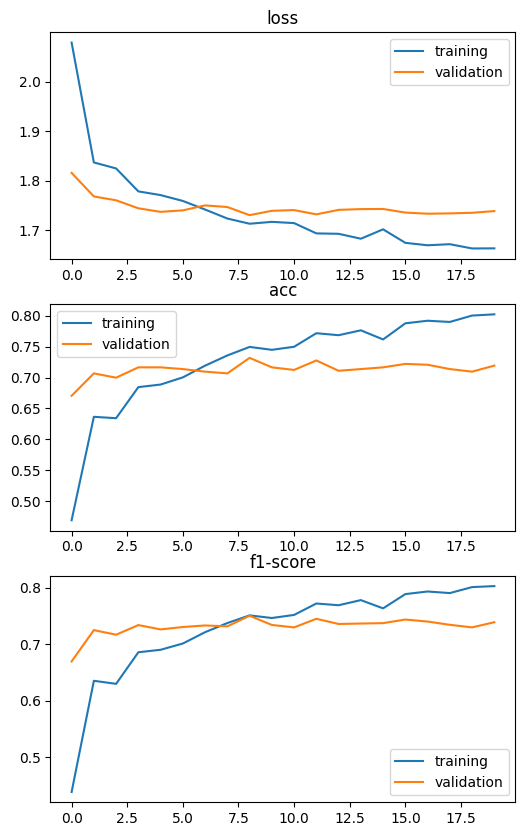

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, figsize= (6,10))
# loss
axs[0].plot(history_train['loss'], label = 'training')
axs[0].plot(history_val['loss'], label = 'validation')
axs[0].set_title("loss")
axs[0].legend()
# acc
axs[1].plot(history_train['acc'], label = 'training')
axs[1].plot(history_val['acc'], label = 'validation')
axs[1].set_title("acc")
axs[1].legend()
# f1-score
axs[2].plot(history_train['f1-score'], label = 'training')
axs[2].plot(history_val['f1-score'], label = 'validation')
axs[2].set_title("f1-score")
axs[2].legend()
plt.show()

In [ ]:
import mlflow
import mlflow.pytorch
from mlflow import MlflowClient

def print_auto_logged_info(run):
    tags = {k: v for k, v in run.data.tags.items() if not k.startswith("mlflow.")}
    artifacts = [f.path for f in MlflowClient().list_artifacts(run.info.run_id, "model")]
    print("run_id: {}".format(run.info.run_id))
    print("artifacts: {}".format(artifacts))
    for artifact_path in ["model/data"]:
        artifacts = [
            f.path for f in MlflowClient().list_artifacts(run.info.run_id, artifact_path)
        ]
        print("artifacts: {}".format(artifacts))


mlflow.pytorch.log_model(net, "model")

mlflow.log_param("learning_rate", 0.02)
mlflow.log_param("momentum", 0.9)

for epoch in range(epochs):
    mlflow.log_metric("training_loss", history_train['loss'][epoch], step=epoch)
    mlflow.log_metric("training_accuracy", history_train['acc'][epoch], step=epoch)
    mlflow.log_metric("training_f1-score", history_train['f1-score'][epoch], step=epoch)
    mlflow.log_metric("validation_loss", history_val['loss'][epoch], step=epoch)
    mlflow.log_metric("validation_accuracy", history_val['acc'][epoch], step=epoch)
    mlflow.log_metric("validation_f1-score", history_val['f1-score'][epoch], step=epoch)

print_auto_logged_info(mlflow.get_run(run_id=current_run.info.run_id))

run_id: e04d160132904b65884bae612f5be3d2
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/python_env.yaml', 'model/requirements.txt', 'model/data']
artifacts: ['model/data/model.pth', 'model/data/pickle_module_info.txt']


In [ ]:
mlflow.end_run()

# Predict

In [ ]:
!mkdir test

In [ ]:
!unzip -q "/content/drive/MyDrive/DS Final Project/Scrape-from-traffy/data.zip" -d test

In [ ]:
dataset.class_to_idx

{'good': 0, 'poor': 1, 'very_poor': 2}

In [ ]:
run_id = 'e04d160132904b65884bae612f5be3d2'
model_uri = f"runs:/{run_id}/model"

loaded_model = mlflow.pytorch.load_model(model_uri, map_location=torch.device('cpu'))

2023/05/13 10:19:47 WARNING mlflow.pytorch: Stored model version '2.0.0+cu117' does not match installed PyTorch version '2.0.0+cu118'


In [ ]:
import pandas as pd

loaded_model.eval()

def prediction(img_path):
    _, _, files = next(os.walk(img_path))
    result = pd.DataFrame(columns = ['image_id', 'class'])
    i = 0
    for image_name in tqdm(files):
        img = Image.open(os.path.join(img_path, image_name)).convert('RGB')
        input = transform(img)
        input = input.unsqueeze_(0)
        input = input.to(device)
        output = loaded_model(input)
        percent_predict = output.amax(dim=1).cpu().detach().numpy()[0]
        if(percent_predict < 0.7):
          pred = "undefined"
        else:
          pred = output.argmax(dim=1).cpu().numpy()[0]
        pred_df = pd.DataFrame({'image_id' : image_name[0:-4], 'class': pred}, index=[0])
        result = pd.concat([result, pred_df], ignore_index=True)
    return result


test_path = './test/data/'
result = prediction(test_path)

  0%|          | 0/31023 [00:00<?, ?it/s]

In [ ]:
from PIL import Image
def show_image(img, size=None):
    image = Image.open(test_path + img)
    if size is not None:
        image = image.resize(size)
    image.show()

In [ ]:
result.head()

,image_id,class
0,244263,0
1,244254,0
2,244253,undefined
3,244274,undefined
4,244276,undefined


In [ ]:
result_file = '/content/drive/MyDrive/DS Final Project/Model/result.csv'

In [ ]:
result.to_csv(result_file, index=False)

In [ ]:
from google.colab import files

files.download(result_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# concat predicted images with their details

In [ ]:
image_details_df = pd.read_csv('/content/drive/MyDrive/DS Final Project/Model/image_details.csv')
image_details_df.head()

,image_id,coords,address,subdistrict,district,province,timestamp
0,11,"100.73357,13.91732",147 ซอย ราษฎร์นิมิต 2 แขวง สามวาตะวันออก เขตคล...,สามวาตะวันออก,คลองสามวา,กรุงเทพมหานคร,2021-09-28 23:01:00.111869+00
1,21,"100.62691,13.82401",144 หมู่ที่ 12 ถนนประดิษฐ์มนูธรรม แขวงคลองกุ่ม...,ลาดพร้าว,ลาดพร้าว,กรุงเทพมหานคร,2021-12-09 11:30:32.08668+00
2,23,"100.48923,13.70383",ตลาดจักรกล แขวง สำเหร่ เขตธนบุรี กรุงเทพมหานคร...,สำเหร่,ธนบุรี,กรุงเทพมหานคร,2021-12-09 11:51:30.682666+00
3,42,"100.60707,13.78742",2078 ถ. ลาดพร้าว แขวง วังทองหลาง เขตวังทองหลาง...,วังทองหลาง,วังทองหลาง,กรุงเทพมหานคร,2021-12-10 12:45:41.078391+00
4,49,"100.65115,13.84352",29 ซอย รามอินทรา 42/1 แขวง รามอินทรา เขตคันนาย...,รามอินทรา,คันนายาว,กรุงเทพมหานคร,2021-12-11 04:38:44.500808+00


In [ ]:
result['image_id'] = result['image_id'].astype(int)

In [ ]:
predicted_image = image_details_df.merge(result, on=['image_id'])
predicted_image.head()

,image_id,coords,address,subdistrict,district,province,timestamp,class
0,11,"100.73357,13.91732",147 ซอย ราษฎร์นิมิต 2 แขวง สามวาตะวันออก เขตคล...,สามวาตะวันออก,คลองสามวา,กรุงเทพมหานคร,2021-09-28 23:01:00.111869+00,1
1,21,"100.62691,13.82401",144 หมู่ที่ 12 ถนนประดิษฐ์มนูธรรม แขวงคลองกุ่ม...,ลาดพร้าว,ลาดพร้าว,กรุงเทพมหานคร,2021-12-09 11:30:32.08668+00,0
2,23,"100.48923,13.70383",ตลาดจักรกล แขวง สำเหร่ เขตธนบุรี กรุงเทพมหานคร...,สำเหร่,ธนบุรี,กรุงเทพมหานคร,2021-12-09 11:51:30.682666+00,0
3,42,"100.60707,13.78742",2078 ถ. ลาดพร้าว แขวง วังทองหลาง เขตวังทองหลาง...,วังทองหลาง,วังทองหลาง,กรุงเทพมหานคร,2021-12-10 12:45:41.078391+00,0
4,49,"100.65115,13.84352",29 ซอย รามอินทรา 42/1 แขวง รามอินทรา เขตคันนาย...,รามอินทรา,คันนายาว,กรุงเทพมหานคร,2021-12-11 04:38:44.500808+00,1


In [ ]:
result_with_details_file = '/content/drive/MyDrive/DS Final Project/Model/result_with_details.csv'

In [ ]:
predicted_image.to_csv(result_with_details_file, index=False)

In [ ]:
from google.colab import files

files.download(result_with_details_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>